### Base imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Import FRETbursts

In [2]:
import fretbursts as frb
sns = frb.init_notebook()

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


### Load datafile

filename: `HP3_TE300_SPC630.hdf5`

In [3]:
fdata = frb.loader.photon_hdf5("HP3_TE300_SPC630.hdf5")

### Check alternation hist

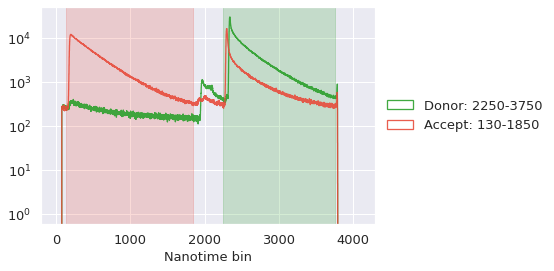

In [4]:
frb.bpl.plot_alternation_hist(fdata)

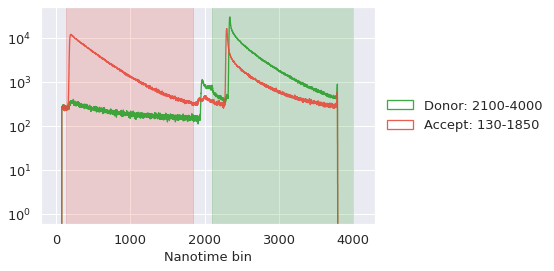

In [5]:
fdata.add(D_ON=[2100, 4000])

frb.bpl.plot_alternation_hist(fdata)

In [6]:
fdata.add(D_ON=[2250, 3750])

frb.loader.alex_apply_period(fdata)

# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849



### Calculate background

In [7]:
fdata.calc_bg(frb.bg.exp_fit, time_s=30, F_bg=1.7)

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]


### Introduce `dplot` function

<AxesSubplot:title={'center':'HP3_TE300_SPC630'}, xlabel='Time (s)', ylabel='BG rate (kcps)'>

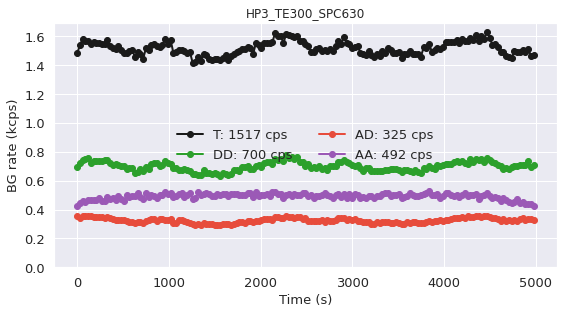

In [8]:
frb.dplot(fdata, frb.timetrace_bg)

### Burst Search

In [9]:
fdata.burst_search(m=10, F=6)

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]


### The mburst object

In [10]:
fdata.mburst[0]

,istart,istop,start,stop
0,120,132,1612806,1641207
1,133,157,1657978,1685840
2,219,247,2614513,2664765
3,248,266,2667626,2708523
4,277,299,2808120,2833739
...,...,...,...,...
171778,11413283,11413297,100176724996,100176761073
171779,11413894,11413908,100184856845,100184881869
171780,11414020,11414038,100186251896,100186285891
171781,11414065,11414076,100186489970,100186515251


### `alex_jointplot`

Primarily for initial visuallization

<class 'matplotlib.figure.Figure'>


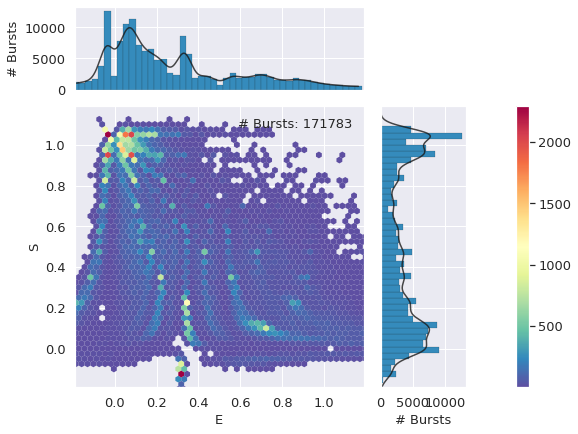

In [11]:
frb.alex_jointplot(fdata);

### Selecting bursts

<class 'matplotlib.figure.Figure'>


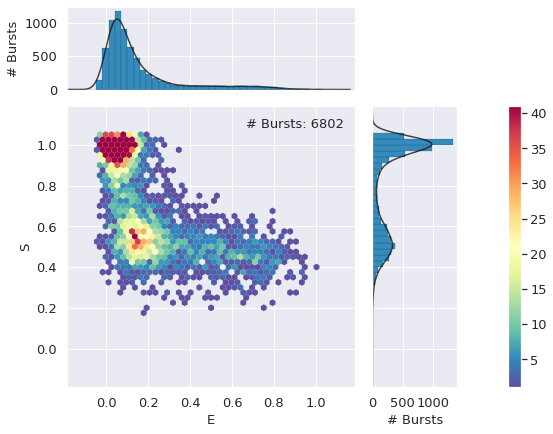

In [12]:
fdata = fdata.select_bursts(frb.select_bursts.size, th1=30)

frb.alex_jointplot(fdata);

### DCBS

Deep copy executed.
Deep copy executed.
Deep copy executed.
 - Performing burst search (verbose=False) ... - Recomputing background limits for Dex ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Performing burst search (verbose=False) ... - Recomputing background limits for AexAem ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
<class 'matplotlib.figure.Figure'>


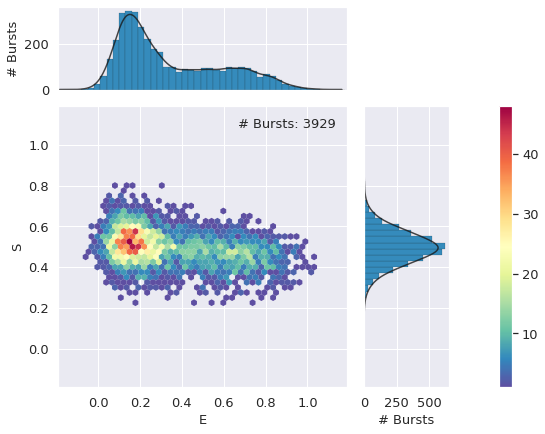

In [13]:
fdata_fret = frb.bext.burst_search_and_gate(fdata, m=10, F=6)
fdata_fret = fdata_fret.select_bursts(frb.select_bursts.size, th1=20)
fdata_fret = fdata_fret.select_bursts(frb.select_bursts.naa,th1=20)
frb.alex_jointplot(fdata_fret);

<AxesSubplot:title={'center':'HP3_TE300_SPC630, #bu=3929'}, xlabel='E', ylabel='# Bursts'>

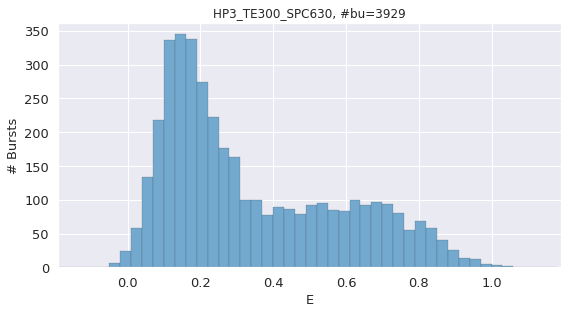

In [14]:
frb.dplot(fdata_fret, frb.hist_fret, pdf=False)

# burstH2MM

In [15]:
import burstH2MM as bhm

In [16]:
bdata = bhm.BurstData(fdata)

In [17]:
bdata

In [18]:
ideal = bdata.models.calc_models()

The model converged after 1 iterations

The model converged after 34 iterations

The model converged after 120 iterations

The model converged after 1752 iterations

![compiling](https://imgs.xkcd.com/comics/compiling.png)

### ICL plot

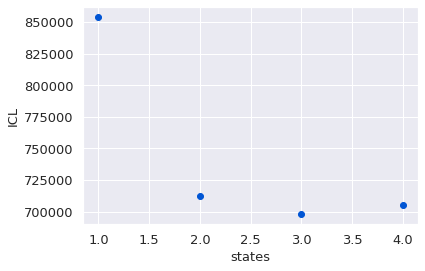

In [19]:
bhm.ICL_plot(bdata.models)

### BIC plot

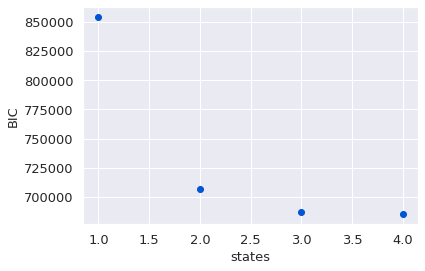

In [20]:
bhm.BIC_plot(bdata.models)

### BIC' plot

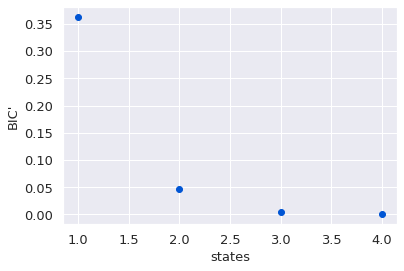

In [21]:
bhm.BICp_plot(bdata.models)

### Model Values

In [28]:
bdata.models[2].E_corr

array([0.65994676, 0.16064733, 0.06794524])

In [26]:
bdata.models[2].S

array([0.420146  , 0.54756732, 0.9691999 ])

In [27]:
bdata.models[2].trans

array([[1.99995151e+07, 4.28085080e+02, 5.67934558e+01],
       [2.18301268e+02, 1.99996048e+07, 1.76854559e+02],
       [2.29487255e+01, 1.28065189e+02, 1.99998490e+07]])

In [31]:
bdata.models[2].dwell_state

array([2, 2, 2, ..., 2, 2, 2], dtype=uint32)

### FRET plot

`state_kwargs = [{'color':'k', 'label':'high fret'}, {'color':'b', 'label':'low fret'}, {'color':'y', 'label':'DO'}]`

In [50]:
bdata.models.ideal = 2

(0.0, 1.0)

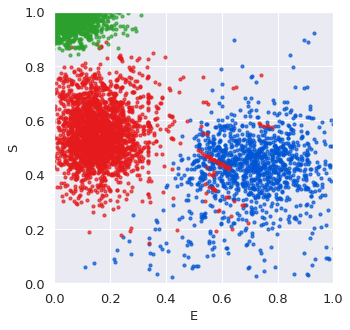

In [53]:
fig, ax = plt.subplots(figsize=(5,5))
bhm.dwell_ES_scatter(bdata.models, ax=ax, add_corrections=True)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

[<BarContainer object of 20 artists>,
 <BarContainer object of 20 artists>,
 <BarContainer object of 20 artists>]

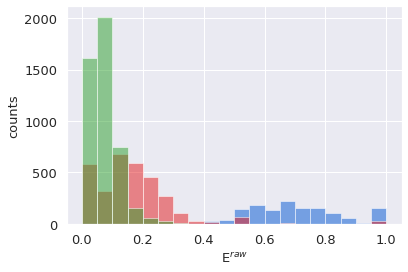

In [37]:
bhm.dwell_E_hist(bdata.models[2])

### Plotting decay histogram

([[<matplotlib.lines.Line2D at 0x7fcbed7b3e50>],
 <matplotlib.legend.Legend at 0x7fcbed7b3c70>)

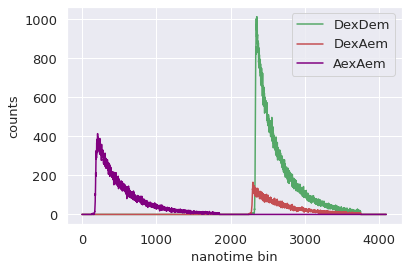

In [38]:
bhm.raw_nanotime_hist(bdata)

### Settng IRF threshhold

`[2355, 2320, 220]`

In [39]:
bdata.irf_thresh=[2355, 2320, 220]

### Plotting nanotimes

In [40]:
bdata.models[2].dwell_nano_mean

array([[3.34609965, 4.60477038, 3.42098207, ..., 3.31935513, 3.48827263,
        5.29195152],
       [7.12147728, 6.4985007 , 4.92273644, ..., 4.20610979, 8.69724154,
        2.29951646],
       [       nan, 9.34464857, 8.61173496, ...,        nan, 1.09937042,
               nan]])

[[<BarContainer object of 50 artists>],
 [<BarContainer object of 50 artists>],
 [<BarContainer object of 50 artists>]]

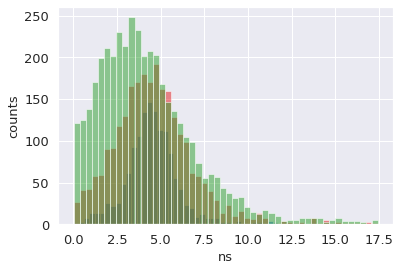

In [43]:
bhm.dwell_tau_hist(bdata.models[2], bins=50, streams=frb.Ph_sel(Dex='Aem'))

[[<matplotlib.collections.PathCollection at 0x7fcbed1f9580>],

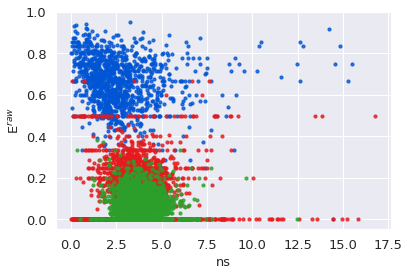

In [47]:
bhm.dwell_E_tau_scatter(bdata.models[2], streams=frb.Ph_sel(Dex='Dem'))